In [11]:
import iris 
import matplotlib.pyplot as plt
import iris.coord_categorisation
import numpy as np
import cartopy as cart
import os
import pandas as pd
import cartopy as cart
import glob

### LOAD ALL NECESSARY FILES

In [12]:
#--------------------------------------------------------------------------
# LOAD DATAFRAMES
#--------------------------------------------------------------------------

os.chdir('C:\\Users\\fb428\\OneDrive - University of Exeter\\Documents\\PhD\\papers\\manuscript3\\figures_and_data\\figure_making\\output_files\\')

site_info = pd.read_csv('station_info.csv')

site = pd.read_csv('diurnal_site.csv')
UKESM = pd.read_csv('diurnal_UKESM.csv')

#-------------tidy dataframes--------------------------------------------

site.rename(columns={'Ozone_avg':'mean_site', 'std':'std_site'}, inplace=True)
UKESM.rename(columns={'Ozone_avg':'mean_UKESM', 'std':'std_UKESM'}, inplace=True)

In [13]:
#--------------------------------------------------------------------------
# MERGE ALL SITES AND ADD NAMES
#--------------------------------------------------------------------------

locs = site_info[['item', 'name']].drop_duplicates()
chose_names = ['Amazonas', 'Porto Velho', 'Santarem', 'Congo', 'Bukit Koto', 'Watukosek',  'Daintree', 'Panama' ]


site_names = pd.merge(site, locs, on=['item'])
UKESM_names = pd.merge(UKESM, locs, on=['item'])

site_choice = site_names[site_names['name'].isin(chose_names)]
UKESM_choice = UKESM_names[UKESM_names['name'].isin(chose_names)]

n = len(chose_names)

## PLOT

In [14]:
min_hours = []
max_hours = []

for item in chose_names:
    site_data = site_choice[site_choice['name']==item]
    min_hour = site_data[site_data['mean_site']==np.min(site_data['mean_site'])]['Hour']
    max_hour = site_data[site_data['mean_site']==np.max(site_data['mean_site'])]['Hour']
    
    min_hours.append(min_hour.values[0])
    max_hours.append(max_hour.values[0])

In [15]:
min_UKESM = []
max_UKESM = []

for item in chose_names:
    site_data = UKESM_choice[UKESM_choice['name']==item]
    min_hour = site_data[site_data['mean_UKESM']==np.min(site_data['mean_UKESM'])]['Hour']
    max_hour = site_data[site_data['mean_UKESM']==np.max(site_data['mean_UKESM'])]['Hour']
    
    min_UKESM.append(min_hour.values[0])
    max_UKESM.append(max_hour.values[0])

In [16]:
displace = [3,3,3,23,18,18,14,5,3,]
displace_site = [3,3,3,0,0,0,0,0,3]
order = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

In [17]:
local_min_UKESM = [min_UKESM[i]-order[displace[i]] for i in range(8)]

In [18]:
local_max_UKESM = [max_UKESM[i]-order[displace[i]] for i in range(8)]

In [19]:
local_min_site = [min_hours[i]-order[displace_site[i]] for i in range(8)]
local_max_site = [max_hours[i]-order[displace_site[i]] for i in range(8)]

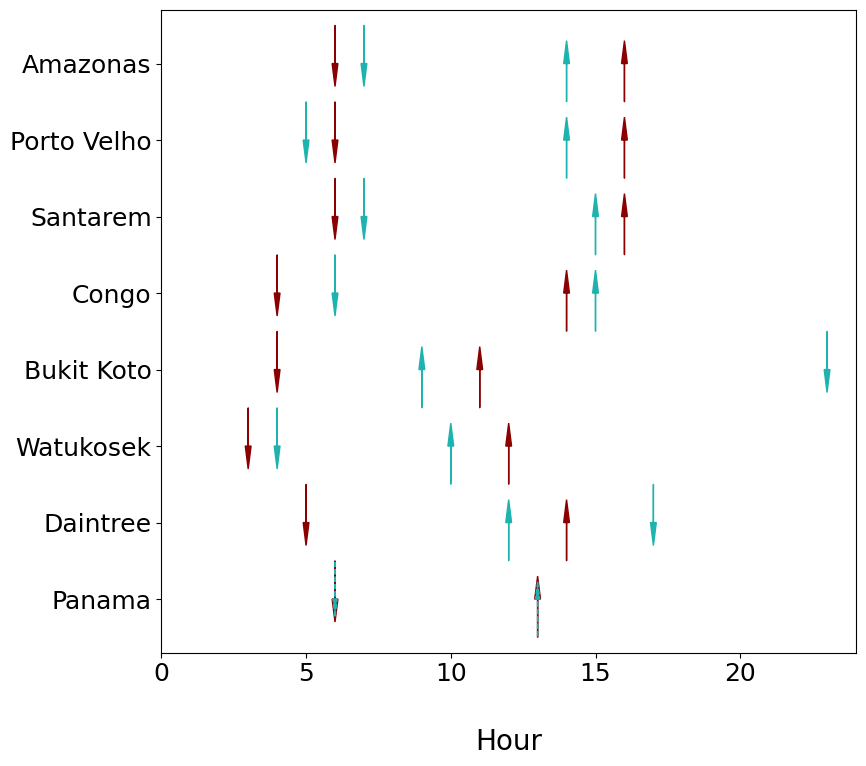

In [21]:
#----------------------------------------------------------------
# main plot
#----------------------------------------------------------------

plt.figure(figsize=(9,8))
plt.rcParams['font.size']=18

def over_0(value):
    if value <= 0:
        new_value = value +24
        
    else:
        new_value = value
        
    return(new_value)


for i in range(7):    

#--------------------------------lines--------------------------------------------

    plt.arrow(over_0(local_min_UKESM[i]), 7-i+1, 0, -0.5, color='darkred', head_width = 0.2)
    plt.arrow(over_0(local_max_UKESM[i]), 7-i, 0, 0.5, color='darkred', head_width = 0.2)
    
    plt.arrow(over_0(local_min_site[i]), 7-i+1, 0, -0.5, color=[0.1157, 0.7022, 0.6843], head_width = 0.2)
    plt.arrow(over_0(local_max_site[i]), 7-i, 0, 0.5, color=[0.1157, 0.7022, 0.6843], head_width = 0.2)
    
plt.arrow(over_0(local_min_UKESM[7]), 0+1, 0, -0.5, color='darkred', head_width = 0.2)
plt.arrow(over_0(local_max_UKESM[7]), 0, 0, 0.5, color='darkred', head_width = 0.2)
    
plt.arrow(over_0(local_min_site[7]), 0+1, 0, -0.5, color=[0.1157, 0.7022, 0.6843], linestyle = 'dashed', head_width = 0.15)
plt.arrow(over_0(local_max_site[7]), 0, 0, 0.5, color=[0.1157, 0.7022, 0.6843], linestyle = 'dashed', head_width = 0.15)

    # axes
  #  plt.title(item, size=28, pad=25)
plt.xlabel('Hour', size = 20, labelpad = 30)
plt.yticks(np.linspace(0.5,7.5,8), chose_names[::-1])
plt.xlim(0,24)
plt.ylim(-0.2,8.2)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

plt.savefig('figures/Fig_4.png', dpi=300)